In [23]:
import numpy as np
import pandas as pd
import h5py
import os
from visualization_utility import plot_data
from NN_model_plots import plot_learning_curve, plot_random, plot_relative_errors, plot_errors_hist
from emulator_preds import load_emulator_val_preds, load_emulator_test_preds
from RT_model_data import load_RT_model_outputs_val_data, load_RT_model_outputs_test_data

<h3>RT outputs</h3>

In [2]:
val_data_RT = load_RT_model_outputs_val_data("/fmi/projappl/project_2001985/jamin/data/libradtran_data/NN_data/val_data_RT/")

In [3]:
test_data_RT = load_RT_model_outputs_test_data("/fmi/projappl/project_2001985/jamin/data/libradtran_data/NN_data/test_data_RT/")

In [4]:
val_data_RT.keys()

dict_keys(['edif_val', 'edir_val', 'path_rad_val', 'SA_val', 'tdif_up_val', 'tdir_up_val'])

In [5]:
test_data_RT.keys()

dict_keys(['edif_test', 'edir_test', 'path_rad_test', 'SA_test', 'tdif_up_test', 'tdir_up_test'])

In [6]:
##### Validation data #####
edif_val = val_data_RT["edif_val"]
edir_val = val_data_RT["edir_val"]
path_rad_val = val_data_RT["path_rad_val"]
SA_val = val_data_RT["SA_val"]
tdif_up_val = val_data_RT["tdif_up_val"]
tdir_up_val = val_data_RT["tdir_up_val"]

In [7]:
##### Test data #####
edif_test = test_data_RT["edif_test"]
edir_test = test_data_RT["edir_test"]
path_rad_test = test_data_RT["path_rad_test"]
SA_test = test_data_RT["SA_test"]
tdif_up_test = test_data_RT["tdif_up_test"]
tdir_up_test = test_data_RT["tdir_up_test"]

In [8]:
print("##### Validation data #####")
print(f"edif_val shape: {edif_val.shape}")
print(f"edir_val shape: {edir_val.shape}")
print(f"path_rad_val shape: {path_rad_val.shape}")
print(f"SA_val shape: {SA_val.shape}")
print(f"tdif_up_val shape: {tdif_up_val.shape}")
print(f"tdir_up_val shape: {tdir_up_val.shape}")
print()
print("##############################")
print()
print("##### Test data #####")
print(f"edif_test shape: {edif_test.shape}")
print(f"edir_test shape: {edir_test.shape}")
print(f"path_rad_test shape: {path_rad_test.shape}")
print(f"SA_test shape: {SA_test.shape}")
print(f"tdif_up_test shape: {tdif_up_test.shape}")
print(f"tdir_up_test shape: {tdir_up_test.shape}")

##### Validation data #####
edif_val shape: (172, 235002)
edir_val shape: (172, 235002)
path_rad_val shape: (172, 235002)
SA_val shape: (172, 235002)
tdif_up_val shape: (172, 235002)
tdir_up_val shape: (172, 235002)

##############################

##### Test data #####
edif_test shape: (174, 235002)
edir_test shape: (174, 235002)
path_rad_test shape: (174, 235002)
SA_test shape: (174, 235002)
tdif_up_test shape: (174, 235002)
tdir_up_test shape: (174, 235002)


<h3>Emulated outputs</h3>

In [9]:
val_preds = load_emulator_val_preds("/fmi/projappl/project_2001985/jamin/data/libradtran_data/NN_data/val_preds/")

In [10]:
test_preds = load_emulator_test_preds("/fmi/projappl/project_2001985/jamin/data/libradtran_data/NN_data/test_preds/")

In [11]:
val_preds.keys()

dict_keys(['val_preds_edif', 'val_preds_edir', 'val_preds_path_rad', 'val_preds_SA', 'val_preds_tdif_up', 'val_preds_tdir_up'])

In [12]:
test_preds.keys()

dict_keys(['test_preds_edif', 'test_preds_edir', 'test_preds_path_rad', 'test_preds_SA', 'test_preds_tdif_up', 'test_preds_tdir_up'])

In [13]:
##### Validation preds #####
val_preds_edif = val_preds["val_preds_edif"]
val_preds_edir = val_preds["val_preds_edir"]
val_preds_path_rad = val_preds["val_preds_path_rad"]
val_preds_SA = val_preds["val_preds_SA"]
val_preds_tdif_up = val_preds["val_preds_tdif_up"]
val_preds_tdir_up = val_preds["val_preds_tdir_up"]

In [14]:
##### Test preds #####
test_preds_edif = test_preds["test_preds_edif"]
test_preds_edir = test_preds["test_preds_edir"]
test_preds_path_rad = test_preds["test_preds_path_rad"]
test_preds_SA = test_preds["test_preds_SA"]
test_preds_tdif_up = test_preds["test_preds_tdif_up"]
test_preds_tdir_up = test_preds["test_preds_tdir_up"]

In [15]:
print("##### Validation data #####")
print(f"val_preds_edif shape: {val_preds_edif.shape}")
print(f"val_preds_edir shape: {val_preds_edir.shape}")
print(f"val_preds_path_rad shape: {val_preds_path_rad.shape}")
print(f"val_preds_SA shape: {val_preds_SA.shape}")
print(f"val_preds_tdif_up shape: {val_preds_tdif_up.shape}")
print(f"val_preds_tdir_up shape: {val_preds_tdir_up.shape}")
print()
print("##############################")
print()
print("##### Test data #####")
print(f"test_preds_edif shape: {test_preds_edif.shape}")
print(f"test_preds_edir shape: {test_preds_edir.shape}")
print(f"test_preds_path_rad shape: {test_preds_path_rad.shape}")
print(f"test_preds_SA shape: {test_preds_SA.shape}")
print(f"test_preds_tdif_up shape: {test_preds_tdif_up.shape}")
print(f"test_preds_tdir_up shape: {test_preds_tdir_up.shape}")

##### Validation data #####
val_preds_edif shape: (172, 235002)
val_preds_edir shape: (172, 235002)
val_preds_path_rad shape: (172, 235002)
val_preds_SA shape: (172, 235002)
val_preds_tdif_up shape: (172, 235002)
val_preds_tdir_up shape: (172, 235002)

##############################

##### Test data #####
test_preds_edif shape: (174, 235002)
test_preds_edir shape: (174, 235002)
test_preds_path_rad shape: (174, 235002)
test_preds_SA shape: (174, 235002)
test_preds_tdif_up shape: (174, 235002)
test_preds_tdir_up shape: (174, 235002)


<h3>Calculate L_TOA on the validation data</h3>

\begin{align*}
    L\_TOA = \text{path_rad} \, + \, \frac{(\text{edir} + \text{edif}) * (\text{tdir} + \text{tdif}) \, * \, \text{albedo}}{\pi \, * \, (1 - \text{spherical_albedo} \, * \, albedo)}
\end{align*}

In [16]:
albedo = 0.15

In [17]:
L_TOA_RT_val = path_rad_val + ((edir_val + edif_val) * (tdir_up_val + tdif_up_val) * albedo) / (np.pi * (1 - SA_val * albedo))

In [18]:
L_TOA_emulated_val = val_preds_path_rad + ((val_preds_edir + val_preds_edif) * (val_preds_tdir_up + val_preds_tdif_up) * albedo) / (np.pi * (1 - val_preds_SA * albedo)) 

<h3>Calculate L_TOA on the test data</h3>

In [19]:
L_TOA_RT_test = path_rad_test + ((edir_test + edif_test) * (tdir_up_test + tdif_up_test) * albedo) / (np.pi * (1 - SA_test * albedo))

In [20]:
L_TOA_emulated_test = test_preds_path_rad + ((test_preds_edir + test_preds_edif) * (test_preds_tdir_up + test_preds_tdif_up) * albedo) / (np.pi * (1 - test_preds_SA * albedo)) 

<h3>Evaluation</h3>

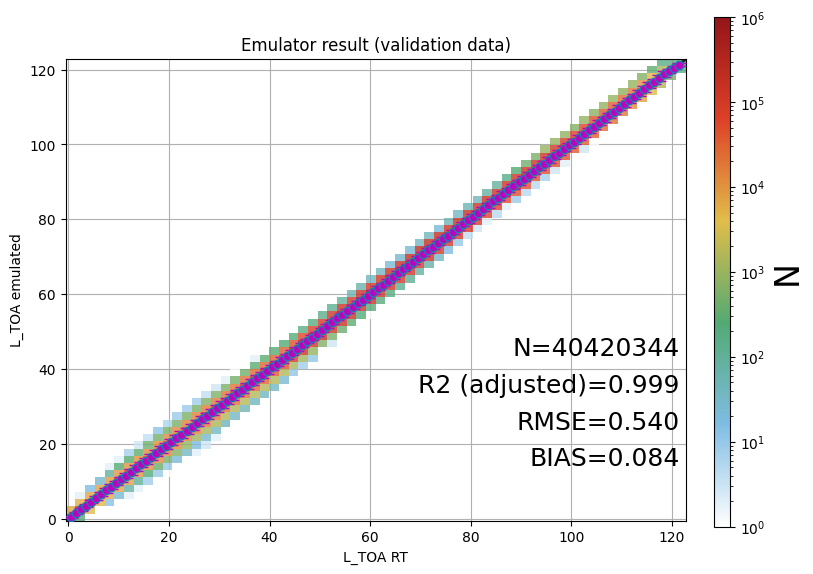

In [21]:
plot_data(y_true=L_TOA_RT_val,
          y_pred=L_TOA_emulated_val,
          title="Emulator result (validation data)",
          x_label="L_TOA RT",
          y_label="L_TOA emulated",
          error_bar_on=True,
          save_fig=False,
          fig_name=None)

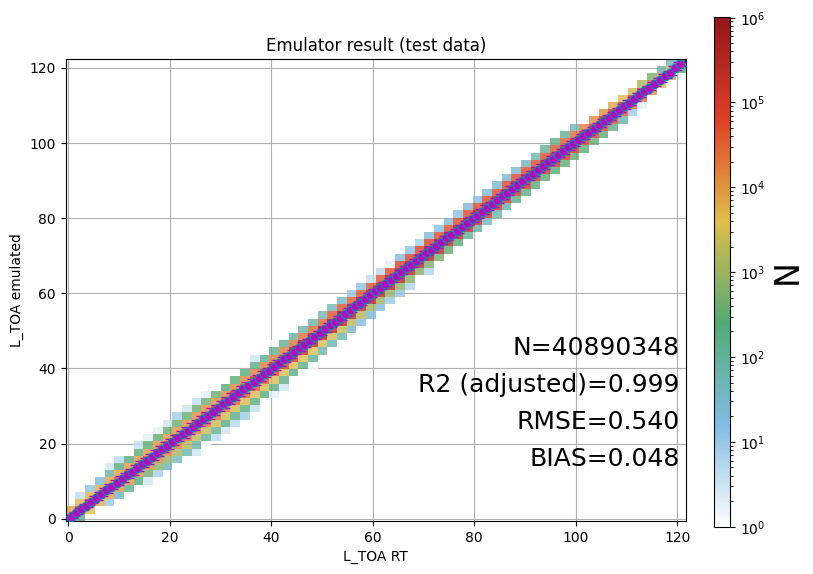

In [22]:
plot_data(y_true=L_TOA_RT_test,
          y_pred=L_TOA_emulated_test,
          title="Emulator result (test data)",
          x_label="L_TOA RT",
          y_label="L_TOA emulated",
          error_bar_on=True,
          save_fig=False,
          fig_name=None)